Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


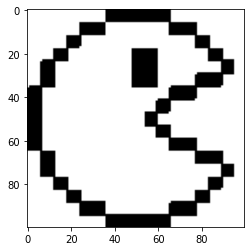

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


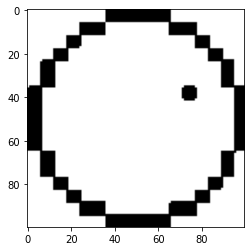

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from copy import deepcopy

threshold = 180

path_train = 'pacman_Train.jpg'
path_test  = 'pacman_Test.jpg'

def read_binarize_img(path_img):
    
    # Read the image
    img_train = Image.open(path_img).convert(mode="L")
    img_train = img_train.resize(size=(100,100))
    
    # Binarize the image
    img_train_array = np.asarray(img_train,dtype=np.uint8)
    x = np.zeros(img_train_array.shape,dtype=np.float)
    x[img_train_array > threshold] = 1
    x[x==0] = -1
    
    return x


# Read images
x = read_binarize_img(path_train)
y = read_binarize_img(path_test)

# Plot images
plt.imshow(np.repeat(x[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(y[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

In [4]:
x = x.reshape(x.shape[0]*x.shape[1], -1)
y = y.reshape(y.shape[0]*y.shape[1], -1)

In [56]:
import numpy as np 
a = np.array([[1, 0, 0, 1]])

W = (2 * a.T -1) @ (2 * a -1) - np.eye(4)

In [57]:
W

array([[ 0., -1., -1.,  1.],
       [-1.,  0.,  1., -1.],
       [-1.,  1.,  0., -1.],
       [ 1., -1., -1.,  0.]])

In [62]:
def active(y_in, out_i, threshold=0.1):
            if y_in > threshold:
                return 1
            elif y_in == threshold:
                return out_i
            elif y_in < threshold:
                return 0
                

In [5]:
from copy import deepcopy

In [64]:
y = np.array([[0, 1, 0, 1]]).T
out = deepcopy(y)

for it in range(2):
    idx = np.random.permutation(out.shape[0])
    for i, index in enumerate(idx):
    # for index in [0, 3, 2, 1]:
        print(idx)
        y_in = y[index] + out.T @ W[:, index]
        print(y_in)
        out[index] = active(y_in, out[index])
        print(out)  
        print('----')
    
    print(out)


[3 2 0 1]
[0.]
[[0]
 [1]
 [0]
 [0]]
----
[3 2 0 1]
[1.]
[[0]
 [1]
 [1]
 [0]]
----
[3 2 0 1]
[-2.]
[[0]
 [1]
 [1]
 [0]]
----
[3 2 0 1]
[2.]
[[0]
 [1]
 [1]
 [0]]
----
[[0]
 [1]
 [1]
 [0]]
[3 2 1 0]
[-1.]
[[0]
 [1]
 [1]
 [0]]
----
[3 2 1 0]
[1.]
[[0]
 [1]
 [1]
 [0]]
----
[3 2 1 0]
[2.]
[[0]
 [1]
 [1]
 [0]]
----
[3 2 1 0]
[-2.]
[[0]
 [1]
 [1]
 [0]]
----
[[0]
 [1]
 [1]
 [0]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iteration:  0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iteration:  1


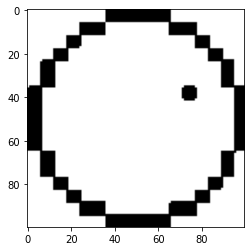

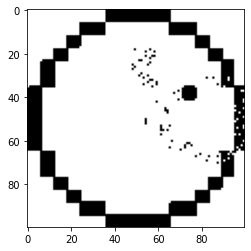

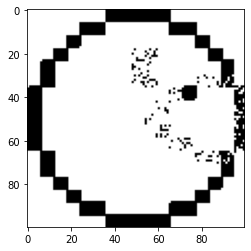

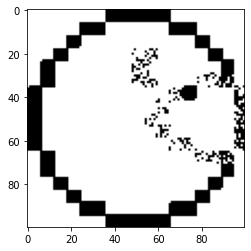

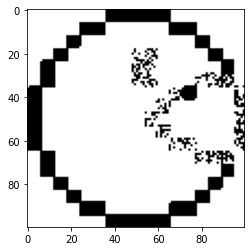

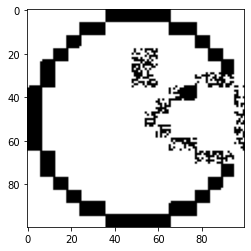

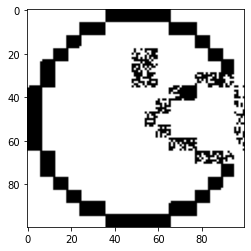

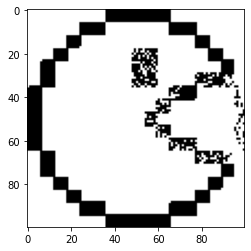

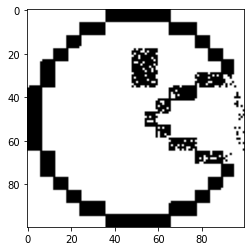

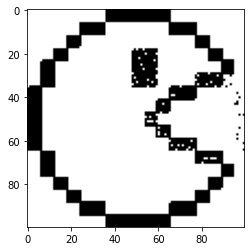

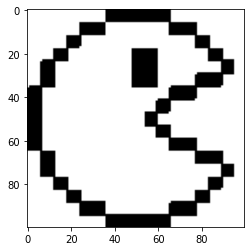

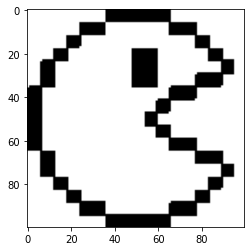

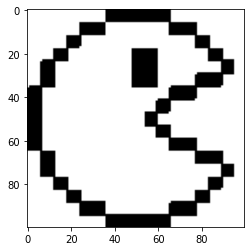

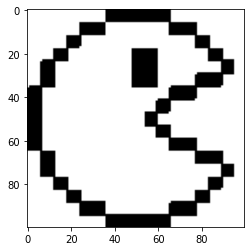

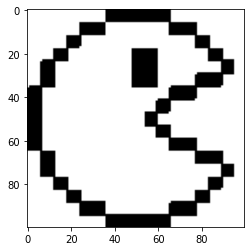

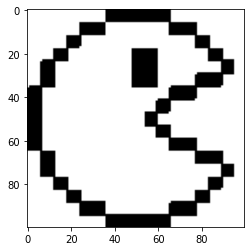

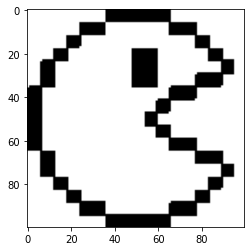

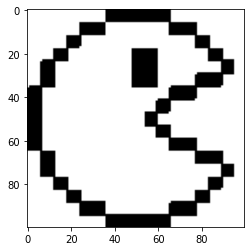

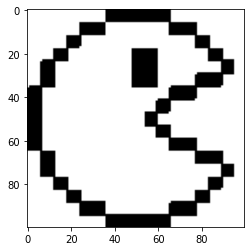

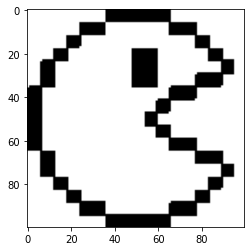

In [7]:
class DiscreteHopfieldNet:
    def __init__(self, x):
        self.x = x
        self.W = (2 * x - 1) @ (2 * x - 1).T
        self.W = self.W - np.diag(np.diag(self.W))

    def run(self, y, n_iter=2):
        out = deepcopy(y)

        def active(y_in, out_i, threshold=0):
            if y_in > threshold:
                return 1
            elif y_in == threshold:
                return out_i
            elif y_in < threshold:
                return 0

        for it in range(n_iter):
            print('iteration: ', it)
            idx = np.random.permutation(out.shape[0])
            for i, index in enumerate(idx):
                y_in = y[index] + out.T @ self.W[:, index]
                out[index] = active(y_in, out[index])  
                
                if i % 1000 == 0:
                    plt.figure();
                    plt.imshow(np.repeat(out.reshape(100, 100)[:,:,np.newaxis], repeats=3, axis=2));

        return out


discrete_hopfield = DiscreteHopfieldNet(x)
output = discrete_hopfield.run(y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


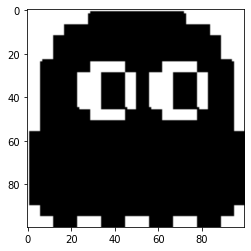

In [8]:
threshold = 180

path_ghost = 'ghost.jpg'

ghost = read_binarize_img(path_ghost)

# Plot images
plt.imshow(np.repeat(ghost[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

In [9]:
ghost = ghost.reshape(ghost.shape[0]*ghost.shape[1], -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iteration:  0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iteration:  1


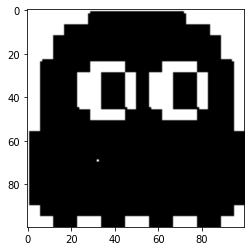

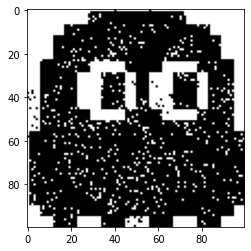

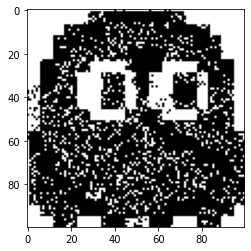

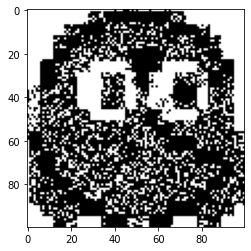

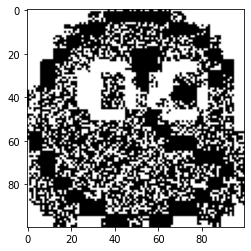

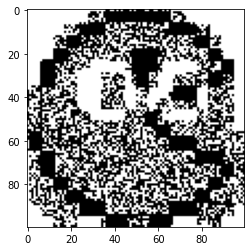

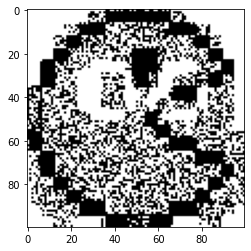

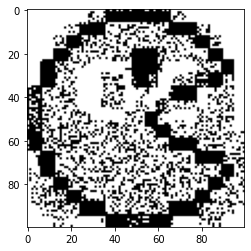

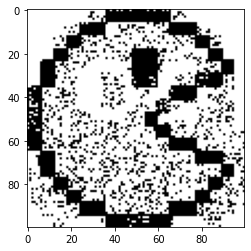

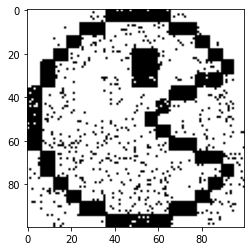

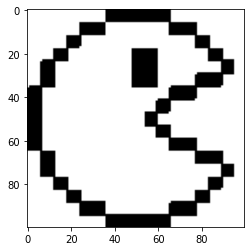

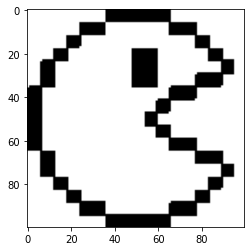

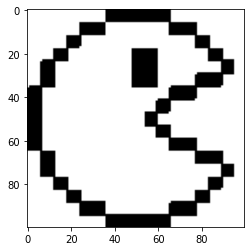

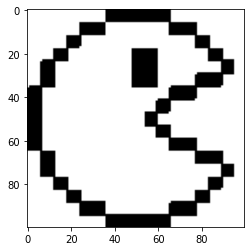

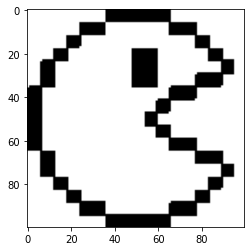

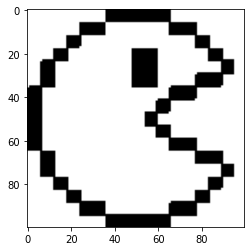

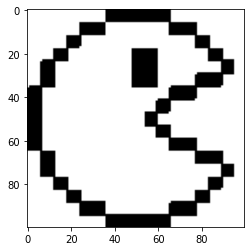

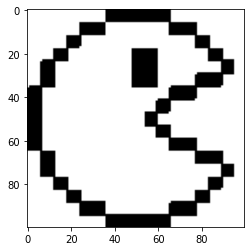

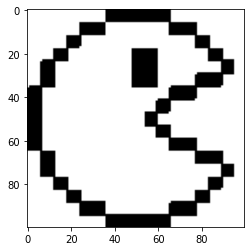

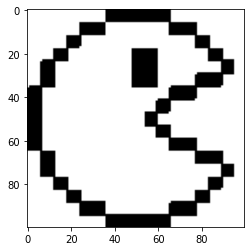

In [11]:
output = discrete_hopfield.run(ghost, n_iter=2)